In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import os
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import mlflow

from lightautoml.automl.presets.tabular_presets import (
    TabularAutoML,
    TabularUtilizedAutoML,
)
from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco

import warnings

warnings.filterwarnings("ignore")


/home/kurmangazy/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
mlflow.start_run()

<ActiveRun: >

In [32]:
np.random.seed(42)

In [18]:
data_dir = os.path.join(os.path.dirname(os.getcwd()), "Data")


In [47]:
train = pd.read_csv(os.path.join(data_dir, "train.csv"))
test = pd.read_csv(os.path.join(data_dir, "test.csv"))
sample_submission = pd.read_csv(os.path.join(data_dir, "sample_submission.csv"))


In [49]:
train.drop(columns=["Id"], inplace=True)
test.drop(columns=["Id"], inplace=True)


In [50]:
print(train.shape)
print(test.shape)


(1460, 80)
(1459, 79)


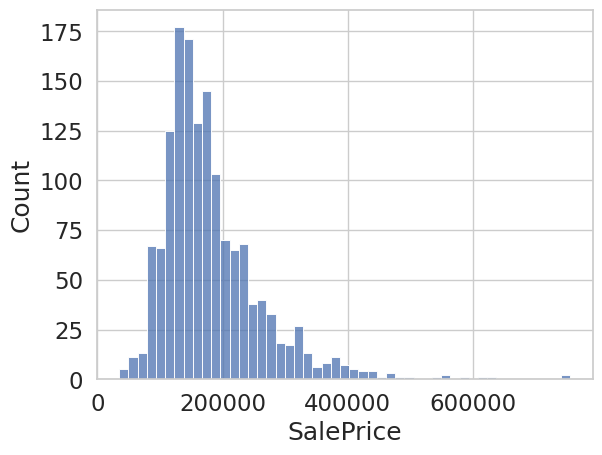

In [84]:
sns.histplot(data=train, x="SalePrice")
plt.show()


In [53]:
N_THREADS = 4
N_FOLDS = 5
RANDOM_STATE = 42
TEST_SIZE = 0.3
TIMEOUT = 300
TARGET_NAME = "SalePrice"


In [55]:
TRAIN, TEST = train_test_split(train, test_size=TEST_SIZE, random_state=RANDOM_STATE)


In [34]:
task = Task("reg")
roles = {"target": TARGET_NAME}


In [92]:
RD = ReportDeco(output_path="tabularAutoML_model_report")

automl_rd = RD(
    TabularAutoML(
        task=task,
        timeout=TIMEOUT,
        cpu_limit=N_THREADS,
        reader_params={
            "n_jobs": N_THREADS,
            "cv": N_FOLDS,
            "random_state": RANDOM_STATE,
        },
        general_params={
            "nested_cv": False,
            "use_algos": [["linear_l2", "cd_tuned", "lgb_tuned"]],
        },
        tuning_params={"max_tuning_iter": 2, "max_tuning_time": 5},
    )
)

In [93]:
%%time
with warnings.catch_warnings():
    # Ignore all future warnings
    warnings.simplefilter("ignore")
    
    oof_pred = automl_rd.fit_predict(TRAIN, roles = roles, verbose = 1)

[22:22:54] Stdout logging level is INFO.
[22:22:54] Task: reg

[22:22:54] Start automl preset with listed constraints:
[22:22:54] - time: 300.00 seconds
[22:22:54] - CPU: 4 cores
[22:22:54] - memory: 16 GB

[22:22:54] Train data shape: (1022, 80)

[22:22:55] Layer 1 train process start. Time left 298.99 secs


/home/kurmangazy/.local/lib/python3.8/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/kurmangazy/.local/lib/python3.8/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/kurmangazy/.local/lib/python3.8/site-packages/lightautoml/transformers/categorical.py:1029: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnts = cnts.append(Series([cnts.shape[0] + 1], index=[np.nan]))
/home/kurmangazy/.local/lib/python3.8/site-packages/lightautoml/transformers/categorical.py:1029: FutureWa

[22:22:56] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[22:23:03] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -1273078005.663019
[22:23:03] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[22:23:03] Time left 290.59 secs

[22:23:04] Selector_LightGBM fitting and predicting completed
[22:23:04] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_0_Tuned_LightGBM ... Time budget is 5.00 secs
[22:23:08] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_0_Tuned_LightGBM completed
[22:23:08] Start fitting Lvl_0_Pipe_1_Mod_0_Tuned_LightGBM ...
[22:23:11] Fitting Lvl_0_Pipe_1_Mod_0_Tuned_LightGBM finished. score = -795050242.8071679
[22:23:11] Lvl_0_Pipe_1_Mod_0_Tuned_LightGBM fitting and predicting completed
[22:23:11] Time left 282.94 secs

[22:23:11] Layer 1 training completed.

[22:23:11] Blending: optimization starts with equal weights and score -916963755.5143907
[22:23:11] Blending: iteration 0: score = -795050242.8071679, weights = [0. 1.]
[22:23:11] Blend

In [87]:
!ls tabularAutoML_model_report


feature_importance.png	      test_target_distribution_1.png
lama_interactive_report.html  valid_error_hist.png
test_error_hist_1.png	      valid_scatter_plot.png
test_scatter_plot_1.png       valid_target_distribution.png


In [94]:
%%time
te_pred = automl_rd.predict(TEST)

Prediction for te_data:
array([[138800.94 ],
       [334071.56 ],
       [105579.23 ],
       [144199.66 ],
       [319540.25 ],
       [ 78643.41 ],
       [208709.25 ],
       [145749.98 ],
       [ 79011.54 ],
       [126507.055],
       [146560.28 ],
       [120472.305],
       [120553.89 ],
       [213793.8  ],
       [176276.11 ],
       [134013.92 ],
       [188090.6  ],
       [132863.89 ],
       [110585.086],
       [210804.12 ],
       [159289.33 ],
       [226564.27 ],
       [176120.4  ],
       [130548.11 ],
       [197673.77 ],
       [167694.77 ],
       [191042.69 ],
       [123286.21 ],
       [179130.69 ],
       [197512.42 ],
       [120559.72 ],
       [261307.1  ],
       [247551.2  ],
       [111962.15 ],
       [244151.62 ],
       [146877.44 ],
       [133613.97 ],
       [203252.4  ],
       [314183.1  ],
       [102078.37 ],
       [128860.76 ],
       [234440.05 ],
       [119199.   ],
       [367315.78 ],
       [127357.7  ],
       [148354.88 ],
       [11

In [95]:
print(
    f"OOF score: {mean_squared_error(TRAIN[TARGET_NAME].values, oof_pred.data[:, 0])}"
)
print(
    f"HOLDOUT score: {mean_squared_error(TEST[TARGET_NAME].values, te_pred.data[:, 0])}"
)


OOF score: 795050242.8071679
HOLDOUT score: 713024382.4208999


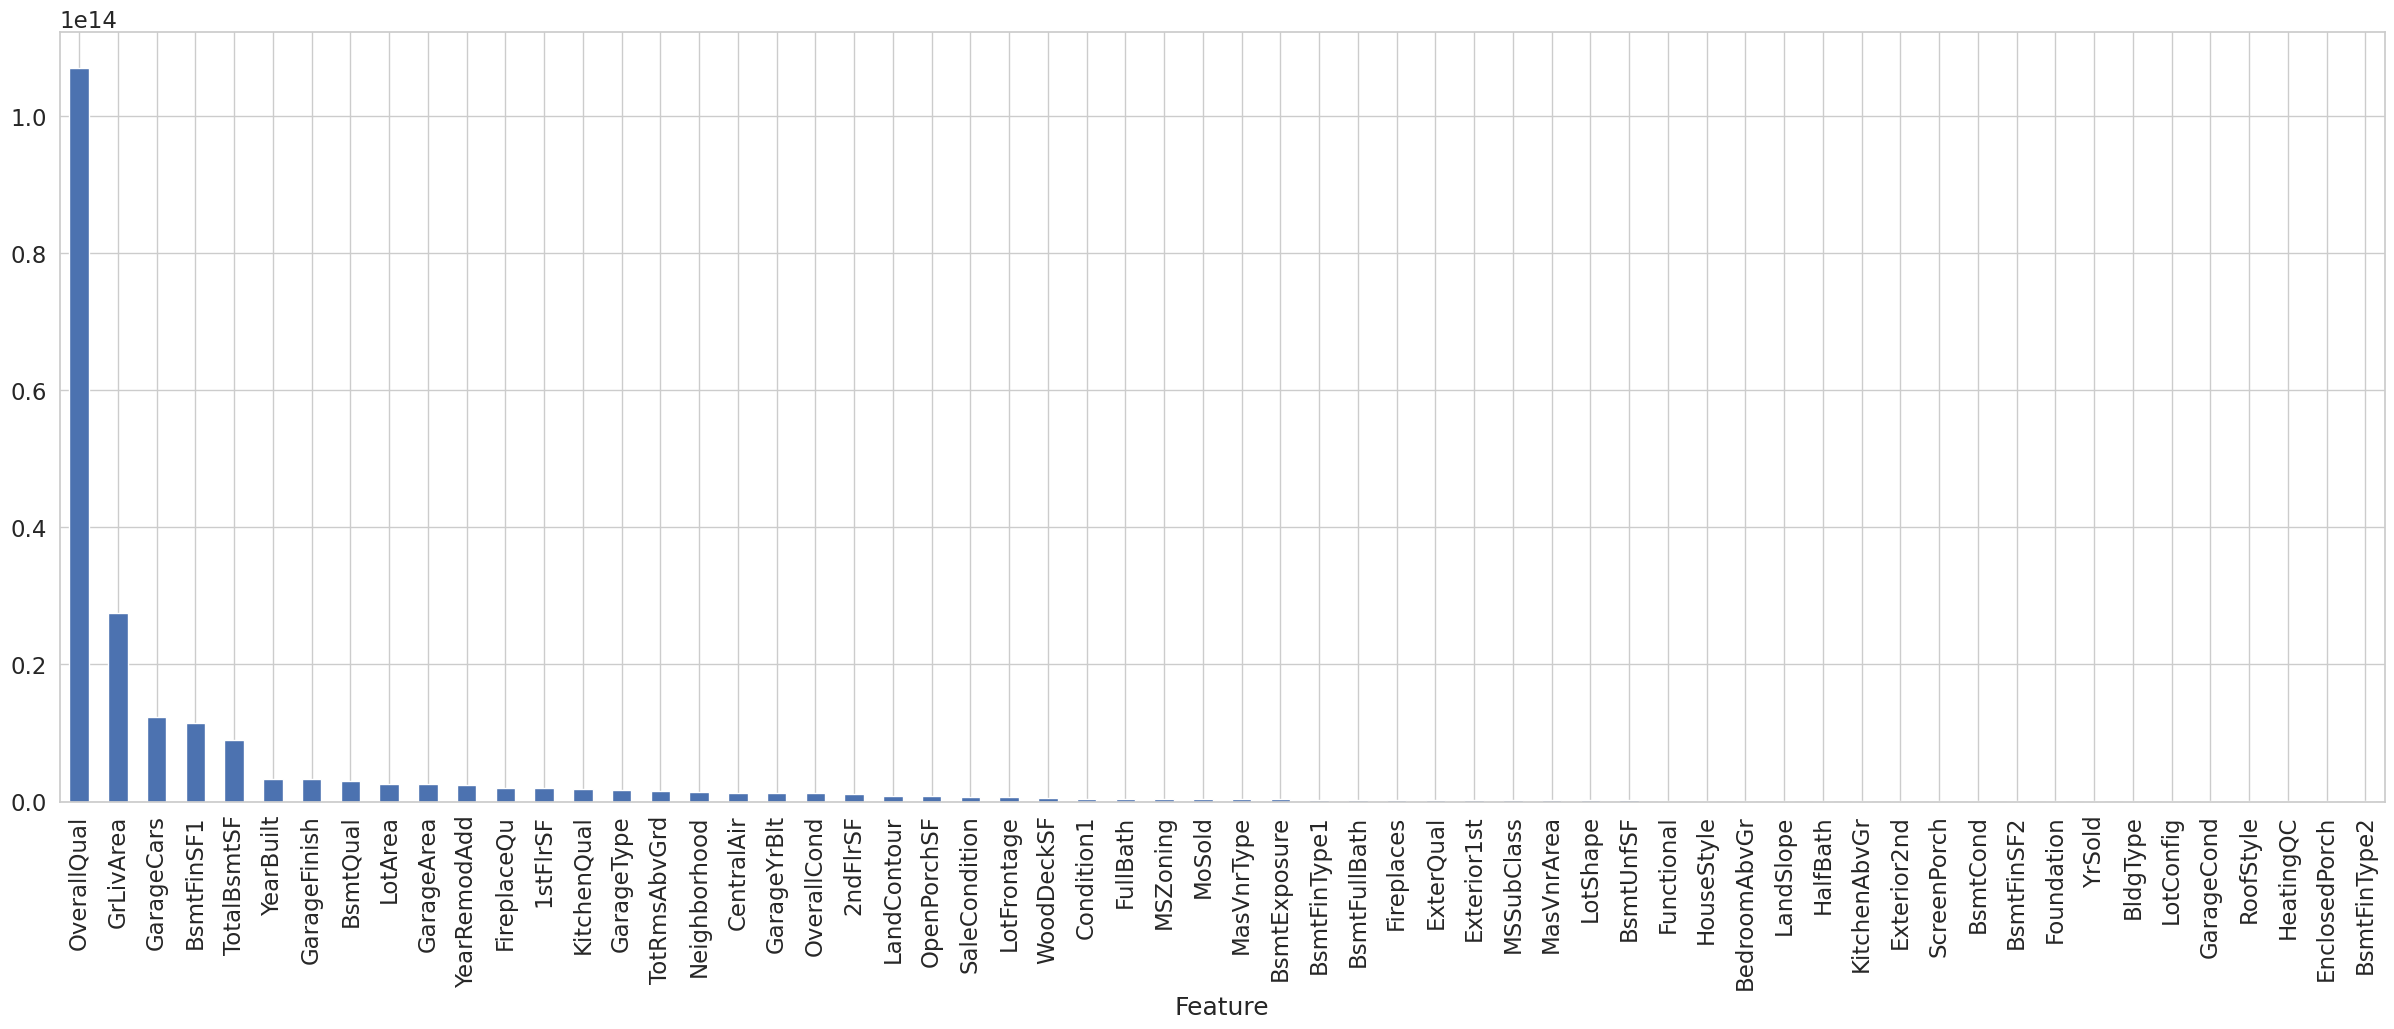

CPU times: user 1.33 s, sys: 95.9 ms, total: 1.43 s
Wall time: 1.26 s


In [96]:
%%time

# Fast feature importances calculation
fast_fi = automl_rd.model.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)
plt.show()

In [97]:
accurate_fi = automl_rd.model.get_feature_scores("accurate", TEST, silent=False)


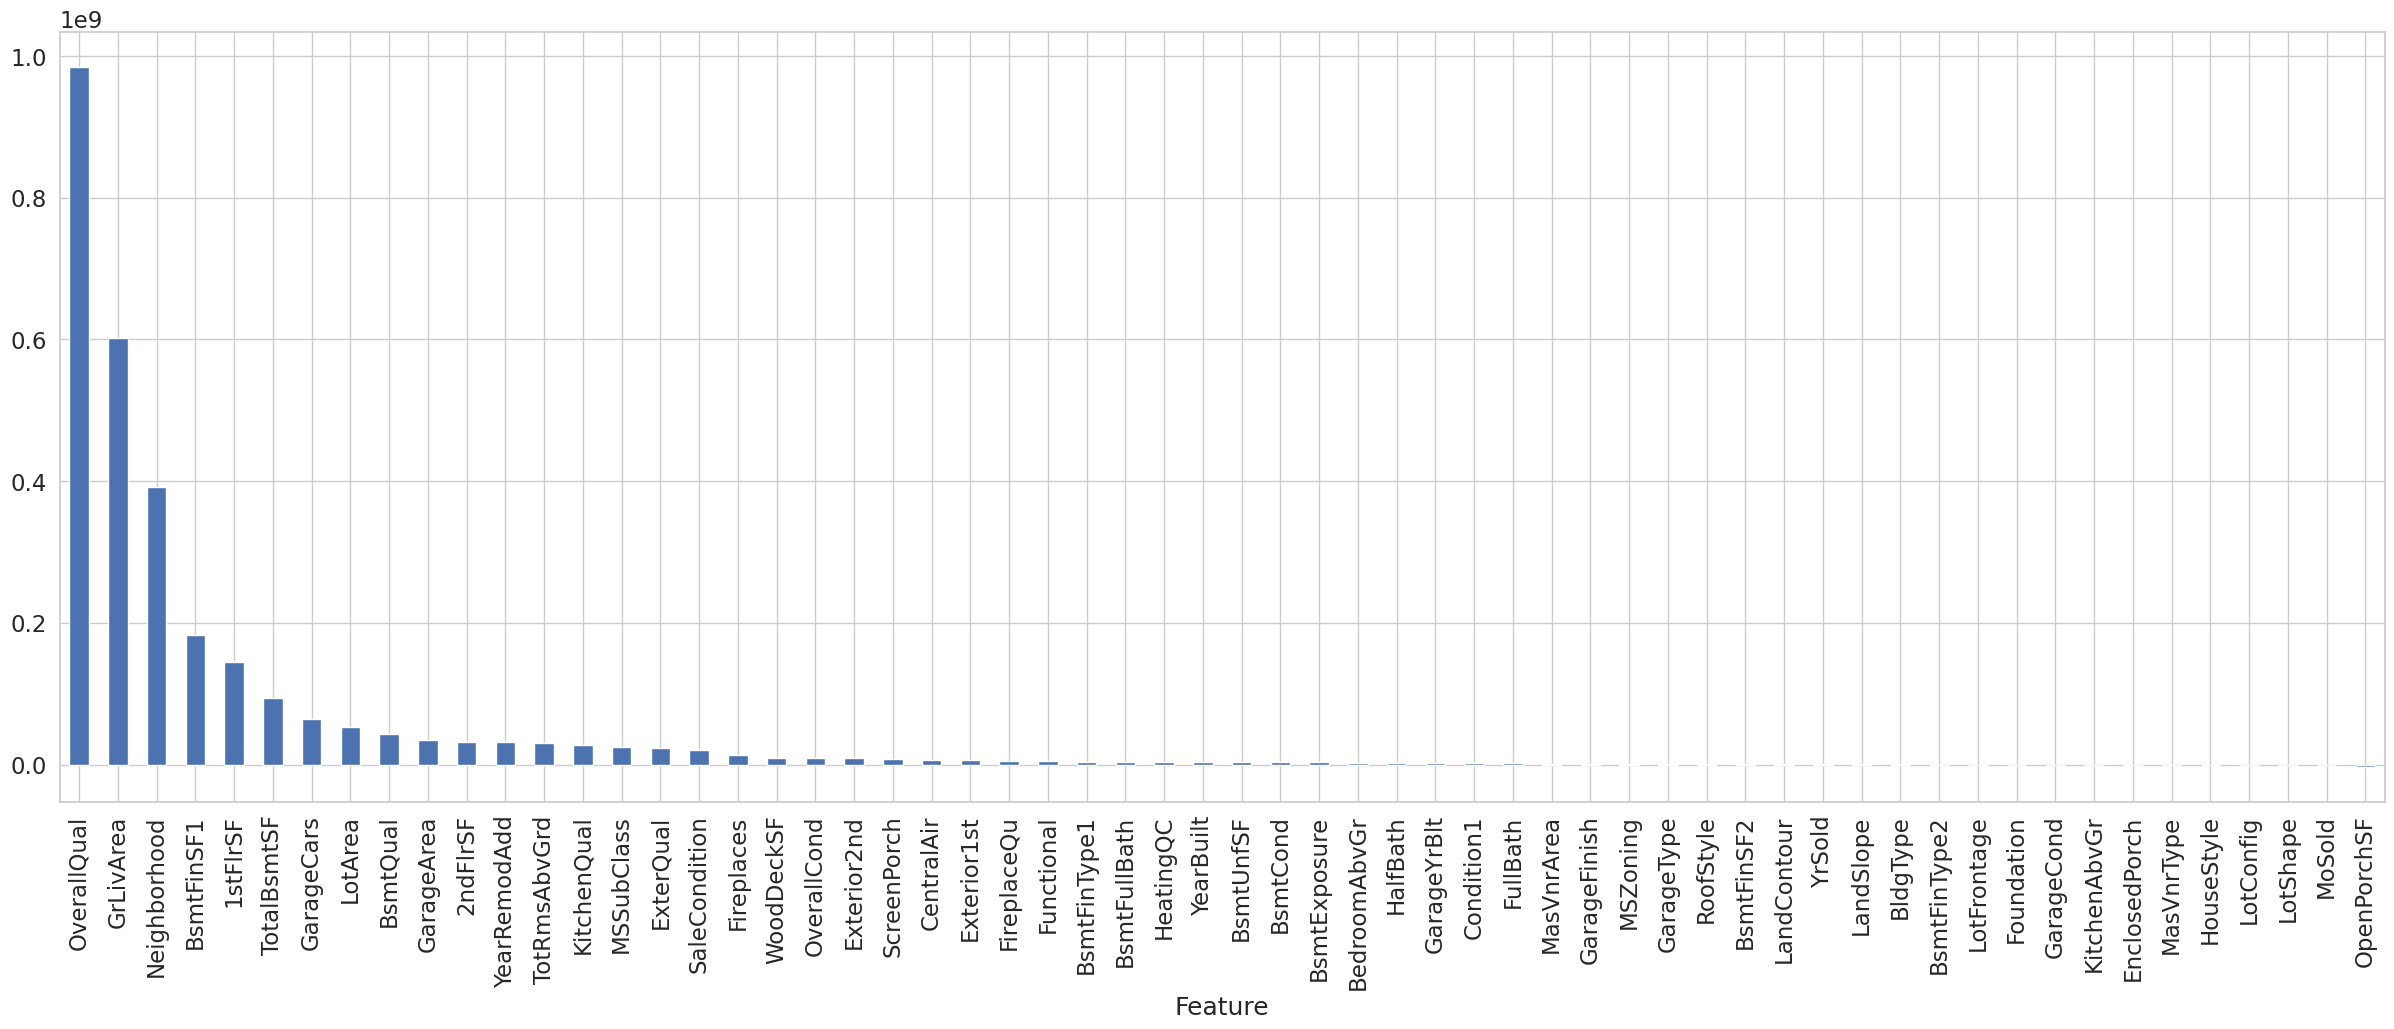

In [98]:
accurate_fi.set_index("Feature")["Importance"].plot.bar(figsize=(30, 10), grid=True)
plt.show()
